In [1]:
from DataLoader import  DataLoader
from utils import *
from visualization import *
from models.unet import UNet
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.debugging.set_log_device_placement(True)

dl = DataLoader()

Using TensorFlow backend.


Num GPUs Available:  1


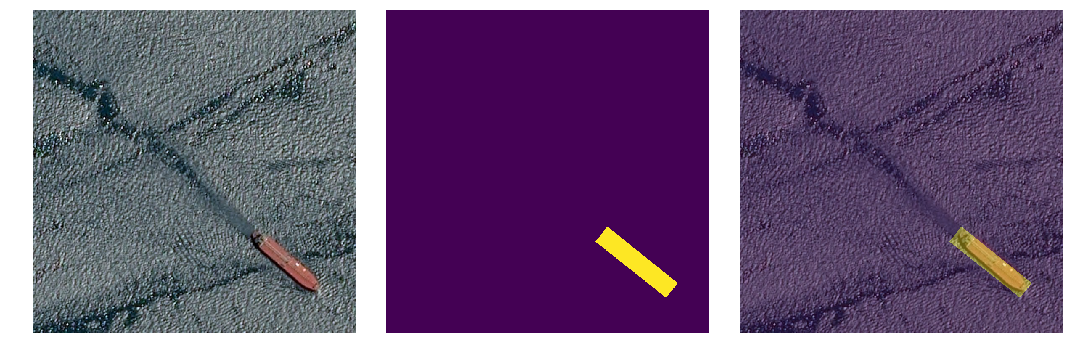

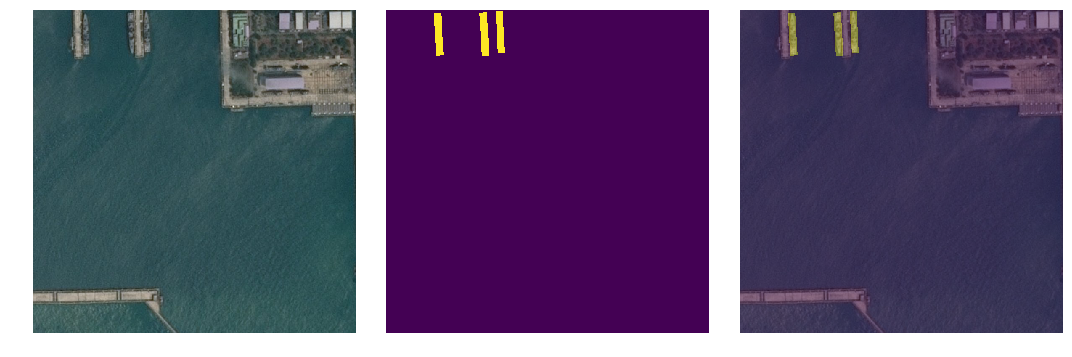

In [2]:
img_id1 = "2bc44586f.jpg"
img_id2 = "4b8c2d29a.jpg"
img1 = dl.get_image(img_id1)
img2 = dl.get_image(img_id2)
plot_masks(img1, dl.get_masks(img_id1))
plot_masks(img2, dl.get_masks(img_id2))

/home/gmandi/miniconda3/envs/AI/lib/python3.7/site-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)
/home/gmandi/miniconda3/envs/AI/lib/python3.7/site-packages/skimage/color/colorconv.py:269: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = (arr[idx, 1] - arr[idx, 2]) / delta[idx]
/home/gmandi/miniconda3/envs/AI/lib/python3.7/site-packages/skimage/color/colorconv.py:273: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = 2. + (arr[idx, 2] - arr[idx, 0]) / delta[idx]
/home/gmandi/miniconda3/envs/AI/lib/python3.7/site-packages/skimage/color/colorconv.py:277: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = 4. + (arr[idx, 0] - arr[idx, 1]) / delta[idx]


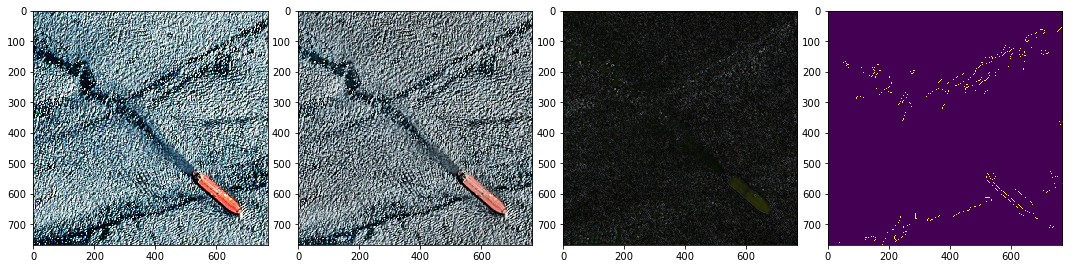

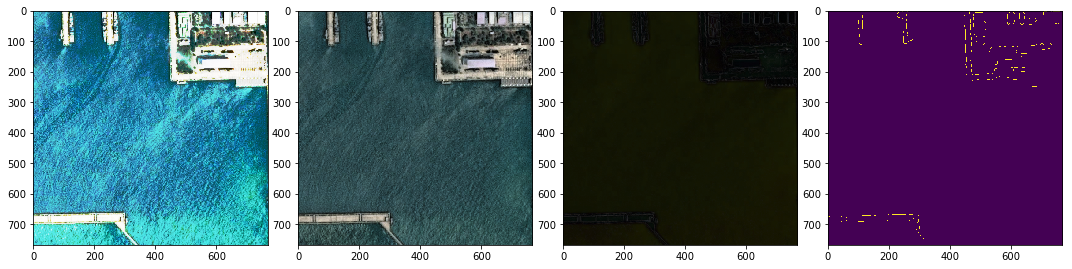

In [3]:
eq_img1 = apply_filter(img1)
adeq_img1 = apply_filter(img1, "adaptive_equalization")
sobel_img1 = apply_filter(img1, "sobel_op")
canny_img1 = apply_filter(img1, "canny_feature")
multiplot_images(1, 4, eq_img1, adeq_img1, sobel_img1, canny_img1)

eq_img2 = apply_filter(img2)
adeq_img2 = apply_filter(img2, "adaptive_equalization")
sobel_img2 = apply_filter(img2, "sobel_op")
canny_img2 = apply_filter(img2, "canny_feature")
multiplot_images(1, 4, eq_img2, adeq_img2, sobel_img2, canny_img2)

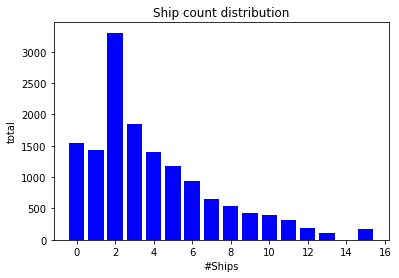

In [4]:
adjusted_set = dl.adjust_set()
plot_ships_frequencies(adjusted_set)

In [5]:
grouped_images_gen = dl.get_grouped_images_gen(adjusted_set)
aug_gen = get_augmented_images_generator(grouped_images_gen)

Images batches as montage
Augmentation results


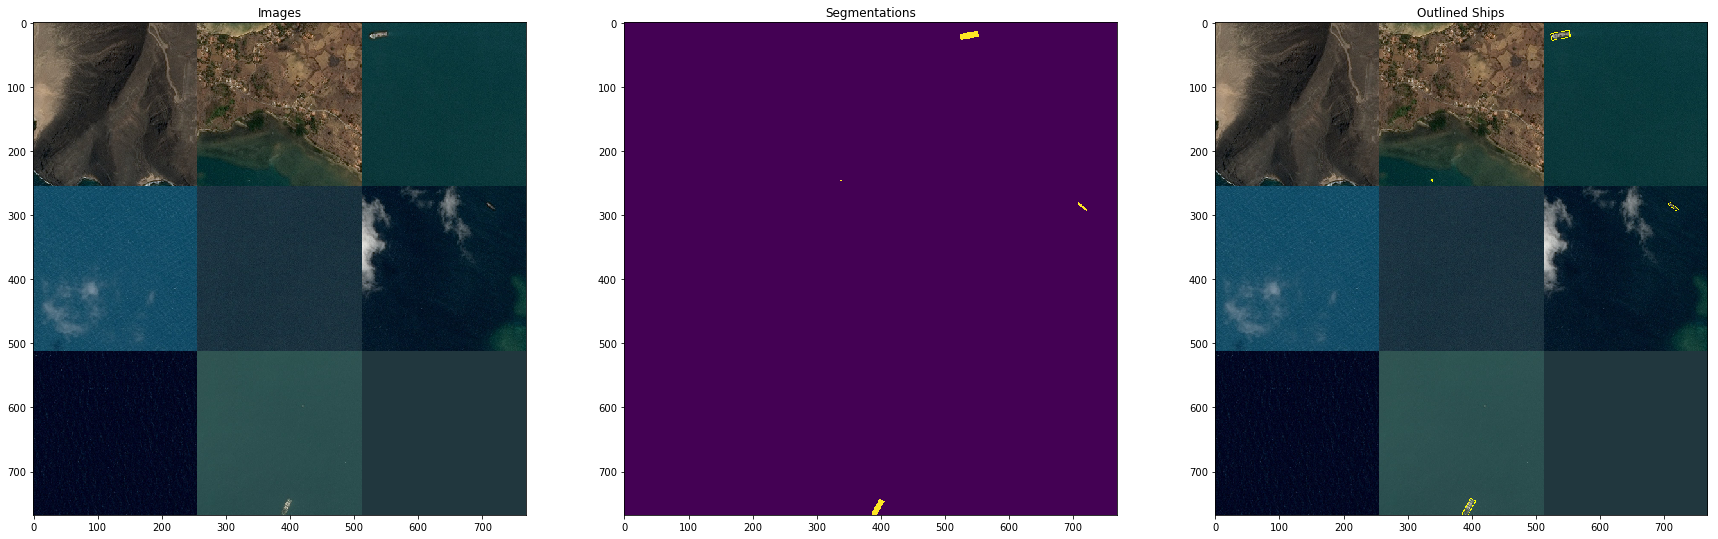

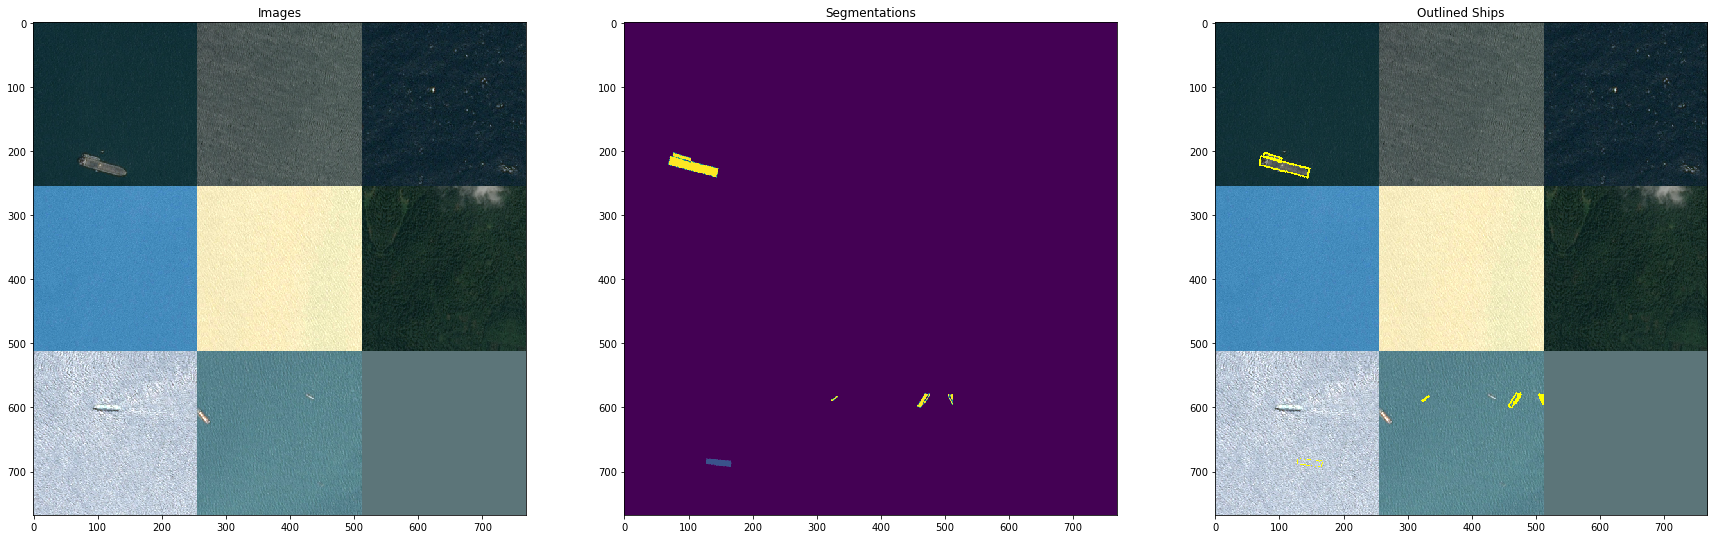

In [7]:
print("Images batches as montage")
train_x, train_y = next(grouped_images_gen)
plot_as_montage(train_x, train_y)

print("Augmentation results")
t_x, t_y = next(aug_gen)
# only keep first 9 samples to examine in detail
t_x = t_x[:9]
t_y = t_y[:9]
plot_as_montage(t_x, t_y)


In [ ]:
train_df, valid_df = dl.train_split()
print("train set shape", train_df.shape)
print("validation set shape", valid_df.shape)

grouped_images_gen = dl.get_grouped_images_gen(train_df)
aug_gen = get_augmented_images_generator(grouped_images_gen)
valid_x, valid_y = next(dl.get_grouped_images_gen(valid_df, 1500)) #valid_df.shape[0]))

train set shape (10119, 5)
validation set shape (4337, 5)


In [7]:
t_x, t_y = next(aug_gen)
t_x = t_x[:9]
t_y = t_y[:9]

unet_model = UNet(t_x.shape[1:])
unet_model.compile()

Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Ran

/home/gmandi/miniconda3/envs/AI/lib/python3.7/site-packages/keras/callbacks/callbacks.py:998: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Epoch 1/4
Executing op __inference_keras_scratch_graph_7714 in device /job:localhost/replica:0/task:0/device:GPU:0
200/200 [==============================] - 80s 402ms/step - loss: -0.0117 - dice_coef: 0.0123 - binary_accuracy: 0.9899 - val_loss: -0.0086 - val_dice_coef: 0.0092 - val_binary_accuracy: 0.9964

Epoch 00001: val_dice_coef improved from -inf to 0.00923, saving model to unet_weights.best.hdf5
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Epoch 2/4
200/200 [==============================] - 76s 381ms/step - loss: -0.0117 - dice_coef: 0.0124 - binary_accuracy: 0.9962 - val_loss: -0.0088 - val_dice_coef: 0.0094 - val_binary_accuracy: 0.9964

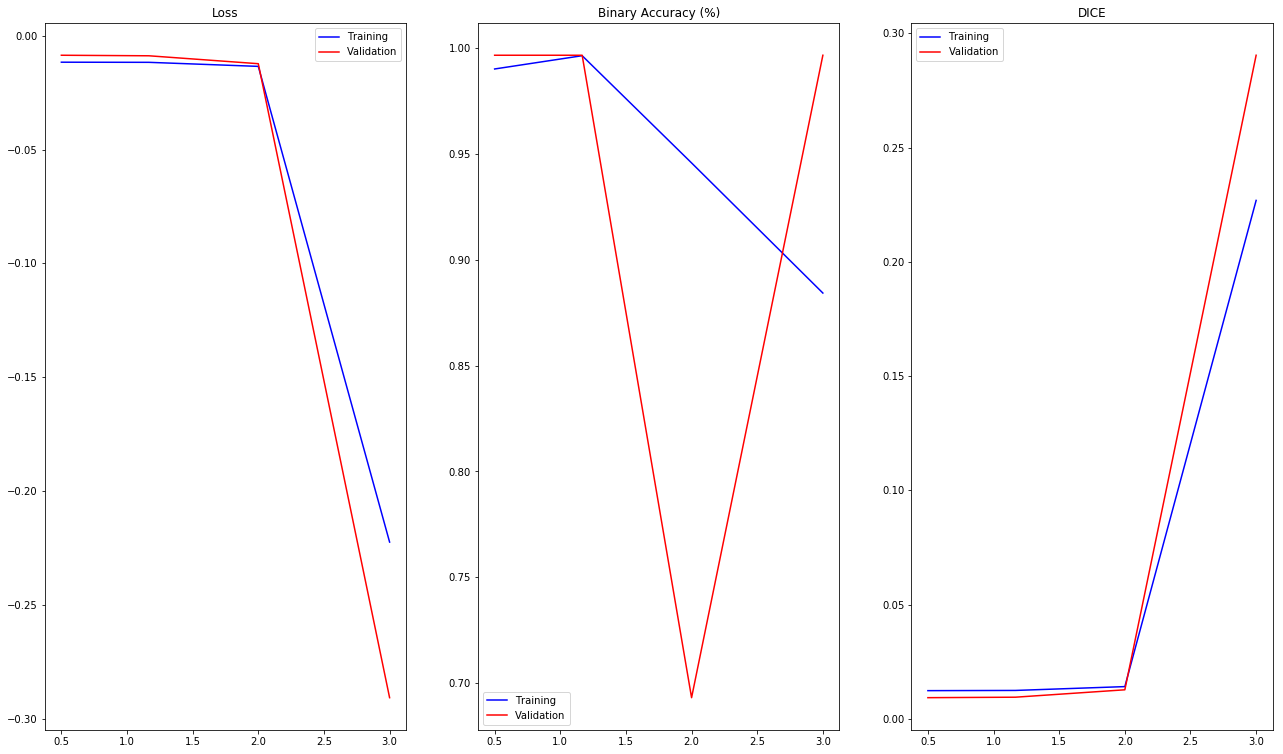

In [8]:
hl = unet_model.validate(aug_gen, train_df.shape[0], valid_set=(valid_x, valid_y), epochs=4)
unet_model.show_loss(hl)

In [8]:
# todo  fix that - visualize results
y = unet_model.infer(valid_x)


fig, axarr = plt.subplots(1, 3, figsize=(15, 40))
axarr[0].axis('off')
axarr[1].axis('off')
axarr[2].axis('off')
axarr[0].imshow(np.squeeze(y[7], axis=(2,)))
axarr[1].imshow(np.squeeze(y[8], axis=(2,)))
axarr[2].imshow(np.squeeze(y[9], axis=(2,)))
plt.tight_layout(h_pad=0.1, w_pad=0.1)
plt.show()


fig2, axarr2 = plt.subplots(1, 3, figsize=(15, 40))
axarr2[0].axis('off')
axarr2[1].axis('off')
axarr2[2].axis('off')
axarr2[0].imshow(valid_x[7])
axarr2[1].imshow(valid_x[8])
axarr2[2].imshow(valid_x[9])
plt.tight_layout(h_pad=0.1, w_pad=0.1)
plt.show()

Executing op __inference_keras_scratch_graph_26521 in device /job:localhost/replica:0/task:0/device:GPU:0


array([[[[0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00],
         ...,
         [0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00]],

        [[0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00],
         ...,
         [0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00]],

        [[0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00],
         ...,
         [0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00]],

        ...,

        [[0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00],
         ...,
         [0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00]],

        [[0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00],
         ...,
         [0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00]],

        [[0.0000000e+00],
         [0.0000000e+00],
         [0.0000000e+00],
         ...,
         [0.0000000e+00],
        